<a href="https://colab.research.google.com/github/KarthikRajan/GenAi/blob/main/CNN_fullset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import torch
import matplotlib as plt
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
%matplotlib inline

transform = transforms.ToTensor()

train_data = datasets.MNIST(root ='\cnn_data', train=True, download=True,transform=transform)

ImportError: cannot import name 'enumerate' from 'itertools' (unknown location)

In [8]:
test_data = datasets.MNIST(root ='\cnn_data', train=False, download=True,transform=transform)

In [9]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: \cnn_data
    Split: Test
    StandardTransform
Transform: ToTensor()

Defin our CNN Model
Describe Convo layer (1,6,3,1), in this  1 = input , 6 convo , kernel =3 and stride =1

In [47]:
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)

In [48]:

conv1 = nn.Conv2d(1,6,3,1)
conv2 = nn.Conv2d(6,16,3,1)

GRAB ONE IMAGE FROM NMIST

In [49]:
for i, (X_Train,y_train) in enumerate(train_data):
  break


In [50]:
X_Train.shape
x = X_Train.view(1,1,28,28)

1st CONVO & POOLING LAYER

In [51]:
x = F.relu(conv1(x))

x = F.max_pool2d(x, 2, 2)



2nd CONVO & POOLING LAYER

In [52]:
x = F.relu(conv2(x))
x = F.max_pool2d(x, 2, 2)

In [53]:
class ConvolutionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1,6,3,1)
    self.conv2 = nn.Conv2d(6,16,3,1)

    # ANN Fully connected layer

    self.fc1 = nn.Linear(5*5*16, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)



  def forward(self, X):
    # CONVO 1 layer
    X = F.relu(conv1(X))
    X = F.max_pool2d(X, 2, 2)
    # CONVO 2 layer
    X = F.relu(conv2(X))
    X = F.max_pool2d(X, 2, 2)

    #Flatten your view
    X = X.view(-1,16*5*5)

    #ANN Fully connected layer
    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = self.fc3(X)

    return F.log_softmax(X, dim=1)

In [56]:
torch.manual_seed(41)

model = ConvolutionModel()
model

ConvolutionModel(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [57]:
Critirian = nn.CrossEntropyLoss()
optimm = torch.optim.Adam(model.parameters(), lr=0.001)

In [59]:
import time
start_time = time.time()

epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []


for i in range(epochs):
  trn_corr = 0
  tes_corr = 0

  for b, (X_train, y_train) in enumerate(train_loader):
    b+=1
    y_pred = model(X_train)
    loss = Critirian(y_pred, y_train)

    predicted = torch.max(y_pred.data, 1)[1]
    batch_corr = (predicted == y_train).sum()
    trn_corr += batch_corr

    optimm.zero_grad()
    loss.backward()
    optimm.step()


    if b%600 ==0:
      print(f' Epoch {i}  batch {b}  Loss {loss.item()}')

  train_losses.append(loss)
  train_correct.append(trn_corr)


  with torch.no_grad():
    for b,(X_test, y_test) in enumerate(test_loader):
      y_val =  model(X_test)
      predicted = torch.max(y_val.data, 1)[1]
      tes_corr+= (predicted == y_test).sum()


  loss = Critirian(y_val, y_test)
  test_losses.append(loss)
  test_correct.append(tes_corr)


current_time = time.time()

total_time = current_time - start_time

print(f'Training time   {total_time/60} min')

 Epoch 0  batch 600  Loss 0.4500834345817566
 Epoch 0  batch 1200  Loss 0.32703977823257446
 Epoch 0  batch 1800  Loss 0.3187883198261261
 Epoch 0  batch 2400  Loss 0.7547351121902466
 Epoch 0  batch 3000  Loss 0.13305889070034027
 Epoch 0  batch 3600  Loss 0.09272395074367523
 Epoch 0  batch 4200  Loss 0.698732852935791
 Epoch 0  batch 4800  Loss 0.1367626190185547
 Epoch 0  batch 5400  Loss 0.20099151134490967
 Epoch 0  batch 6000  Loss 0.07975344359874725
 Epoch 1  batch 600  Loss 0.4214560389518738
 Epoch 1  batch 1200  Loss 0.019731566309928894
 Epoch 1  batch 1800  Loss 0.39916834235191345
 Epoch 1  batch 2400  Loss 0.8095097541809082
 Epoch 1  batch 3000  Loss 0.24530640244483948
 Epoch 1  batch 3600  Loss 0.047934673726558685
 Epoch 1  batch 4200  Loss 0.01901736669242382
 Epoch 1  batch 4800  Loss 0.005809720605611801
 Epoch 1  batch 5400  Loss 0.04216509312391281
 Epoch 1  batch 6000  Loss 0.04137057811021805
 Epoch 2  batch 600  Loss 0.34267184138298035
 Epoch 2  batch 1200 

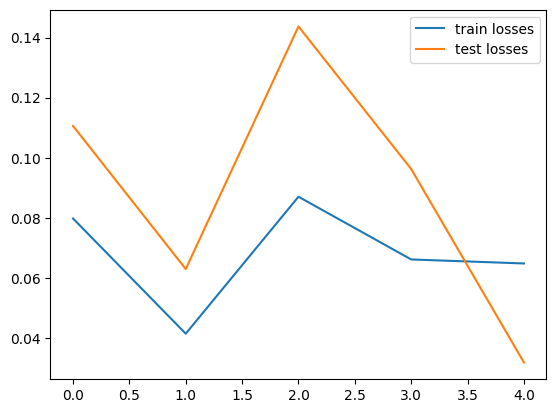

In [65]:
import matplotlib.pyplot  as plt
%matplotlib inline
train_losses = [ t1.item() for t1 in train_losses]
#train_losses = [torch.tensor(t1) for t1 in train_losses]
plt.plot(train_losses, label="train losses")
plt.plot(test_losses, label="test losses")
plt.legend()




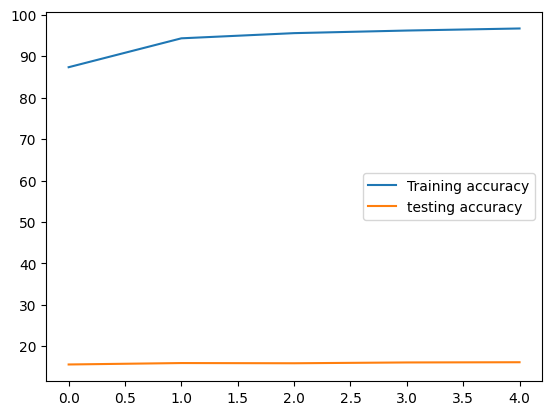

In [66]:
plt.plot([t/600   for t in train_correct], label="Training accuracy")
plt.plot([t/600   for t in test_correct ], label="testing accuracy")

plt.legend()

In [68]:
test_load_all = DataLoader(test_data, batch_size=10000, shuffle=False)

with torch.no_grad():
  correct = 0
  for X_test, y_test in test_load_all:
    y_val = model(X_test)
    predicted = torch.max(y_val, 1)[1]
    correct += (predicted -- y_test).sum()

correct.item()/len(test_data)

8.8562

In [69]:
test_data[4141]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [74]:
test_data[4141][0].reshape(28,28)


tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

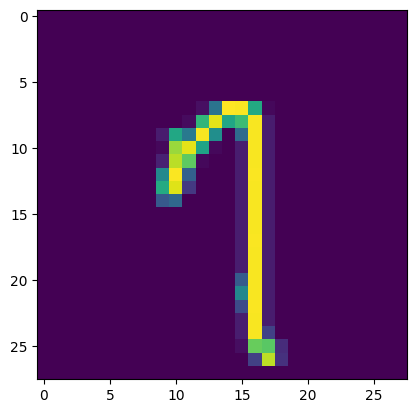

In [79]:
plt.imshow(test_data[4199][0].reshape(28,28))



In [80]:
model.eval()
with torch.no_grad():
  new_pred = model(test_data[4199][0].view(1,1,28,28))

new_pred.argmax()

tensor(7)